In [43]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch the data.
df = pd.read_csv("https://ourworldindata.org/grapher/value-added-in-the-agricultural-sector-as-of-gdp-vs-gdp-per-capita.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the metadata
metadata = requests.get("https://ourworldindata.org/grapher/value-added-in-the-agricultural-sector-as-of-gdp-vs-gdp-per-capita.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

In [44]:
#truncate data to only years 1990>
df= df[df['Year']>=1990]

df.columns

Index(['Entity', 'Code', 'Year', 'nv_agr_totl_zs', 'ny_gdp_pcap_pp_kd',
       'population_historical', 'owid_region'],
      dtype='object')

In [45]:
df.head(10)

,Entity,Code,Year,nv_agr_totl_zs,ny_gdp_pcap_pp_kd,population_historical,owid_region
0,Afghanistan,AFG,2002,38.627890,1774.3087,21378123.0,NaN
1,Afghanistan,AFG,2003,37.418854,1815.9282,22733054.0,NaN
2,Afghanistan,AFG,2004,29.721067,1776.9182,23560656.0,NaN
3,Afghanistan,AFG,2005,31.114855,1908.1147,24404574.0,NaN
4,Afghanistan,AFG,2006,28.635970,1929.7239,25424100.0,NaN
5,Afghanistan,AFG,2007,30.105011,2155.3530,25909852.0,NaN
6,Afghanistan,AFG,2008,24.892270,2191.5044,26482629.0,NaN
7,Afghanistan,AFG,2009,29.297500,2565.0220,27466101.0,NaN
8,Afghanistan,AFG,2010,26.210068,2848.5862,28284088.0,NaN
9,Afghanistan,AFG,2011,23.743664,2757.0525,29347709.0,NaN


In [46]:
#rename columns

df= df.rename(columns={'Entity':'Country', 'nv_agr_totl_zs': 'agr_pct', 'ny_gdp_pcap_pp_kd': 'gdp', 'population_historical': 'pop'})
df.head(5)

,Country,Code,Year,agr_pct,gdp,pop,owid_region
0,Afghanistan,AFG,2002,38.627890,1774.3087,21378123.0,NaN
1,Afghanistan,AFG,2003,37.418854,1815.9282,22733054.0,NaN
2,Afghanistan,AFG,2004,29.721067,1776.9182,23560656.0,NaN
3,Afghanistan,AFG,2005,31.114855,1908.1147,24404574.0,NaN
4,Afghanistan,AFG,2006,28.635970,1929.7239,25424100.0,NaN


In [47]:
df = df.sort_values(by=['Country', 'Year'])

df['gdp_change'] = df.groupby('Country')['gdp'].pct_change() * 100

C:\Users\felic\AppData\Local\Temp\ipykernel_26296\2728711092.py:3: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['gdp_change'] = df.groupby('Country')['gdp'].pct_change() * 100


In [48]:
region_dict = df[['Country', 'owid_region', 'Year']].copy()
region_dict = region_dict[region_dict['Year']==2023]

region_dict

,Country,owid_region,Year
21,Afghanistan,Asia,2023
525,Africa,NaN,2023
599,Africa (UN),NaN,2023
603,Aland Islands,Europe,2023
631,Albania,Europe,2023
...,...,...,...
59022,Yemen Arab Republic,Asia,2023
59046,Yemen People's Republic,Asia,2023
59124,Yugoslavia,Europe,2023
59188,Zambia,Africa,2023


In [49]:
region = dict(zip(region_dict.Country, region_dict.owid_region))
region

{'Afghanistan': 'Asia',
 'Africa': nan,
 'Africa (UN)': nan,
 'Aland Islands': 'Europe',
 'Albania': 'Europe',
 'Algeria': 'Africa',
 'American Samoa': 'Oceania',
 'Americas (UN)': nan,
 'Andorra': 'Europe',
 'Angola': 'Africa',
 'Anguilla': 'North America',
 'Antigua and Barbuda': 'North America',
 'Argentina': 'South America',
 'Armenia': 'Asia',
 'Aruba': 'North America',
 'Asia': nan,
 'Asia (UN)': nan,
 'Asia (excl. China and India)': nan,
 'Australia': 'Oceania',
 'Austria': 'Europe',
 'Austria-Hungary': 'Europe',
 'Azerbaijan': 'Asia',
 'Bahamas': 'North America',
 'Bahrain': 'Asia',
 'Bangladesh': 'Asia',
 'Barbados': 'North America',
 'Belarus': 'Europe',
 'Belgium': 'Europe',
 'Belize': 'North America',
 'Benin': 'Africa',
 'Bermuda': 'North America',
 'Bhutan': 'Asia',
 'Bolivia': 'South America',
 'Bonaire Sint Eustatius and Saba': 'North America',
 'Bosnia and Herzegovina': 'Europe',
 'Botswana': 'Africa',
 'Brazil': 'South America',
 'British Indian Ocean Territory': 'Asi

In [50]:
#put region back to the original dataset
df['Region']= df['Country'].map(region)
df

,Country,Code,Year,agr_pct,gdp,pop,owid_region,gdp_change,Region
251,Afghanistan,AFG,1990,NaN,NaN,12045664.0,NaN,NaN,Asia
252,Afghanistan,AFG,1991,NaN,NaN,12238879.0,NaN,NaN,Asia
253,Afghanistan,AFG,1992,NaN,NaN,13278982.0,NaN,NaN,Asia
254,Afghanistan,AFG,1993,NaN,NaN,14943174.0,NaN,NaN,Asia
255,Afghanistan,AFG,1994,NaN,NaN,16250799.0,NaN,NaN,Asia
...,...,...,...,...,...,...,...,...,...
59440,Zimbabwe,ZWE,2019,9.819262,3294.8062,15271377.0,NaN,-7.785577,Africa
59441,Zimbabwe,ZWE,2020,8.772859,2987.2698,15526888.0,NaN,-9.333975,Africa
59442,Zimbabwe,ZWE,2021,8.849899,3184.7854,15797220.0,NaN,6.611910,Africa
59443,Zimbabwe,ZWE,2022,7.170550,3323.1218,16069061.0,NaN,4.343665,Africa


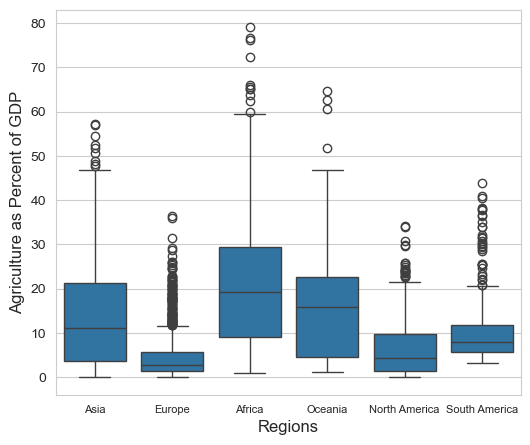

In [51]:
## Boxplot 
plt.figure(figsize=(6,5))

sns.boxplot(data = df,
               y = 'agr_pct',
               x = 'Region')

plt.yticks(fontsize=10)
plt.xticks(fontsize=8)

plt.ylabel("Agriculture as Percent of GDP", fontsize=12)
plt.xlabel("Regions", fontsize=12)

plt.show()

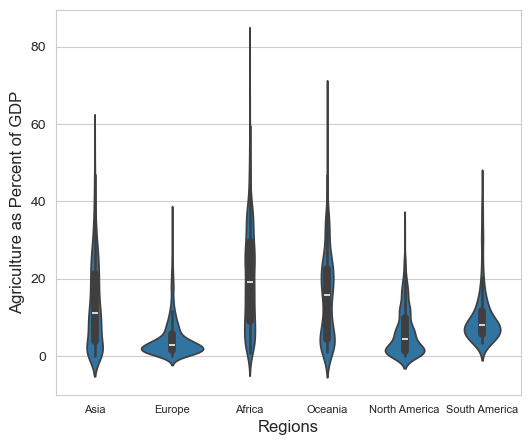

In [52]:
## violinplot for ocean_proximity
plt.figure(figsize=(6,5))

sns.violinplot(data = df,
               y = 'agr_pct',
               x = 'Region')

plt.yticks(fontsize=10)
plt.xticks(fontsize=8)

plt.ylabel("Agriculture as Percent of GDP", fontsize=12)
plt.xlabel("Regions", fontsize=12)

plt.show()

Text(0.5, 0, 'Year')

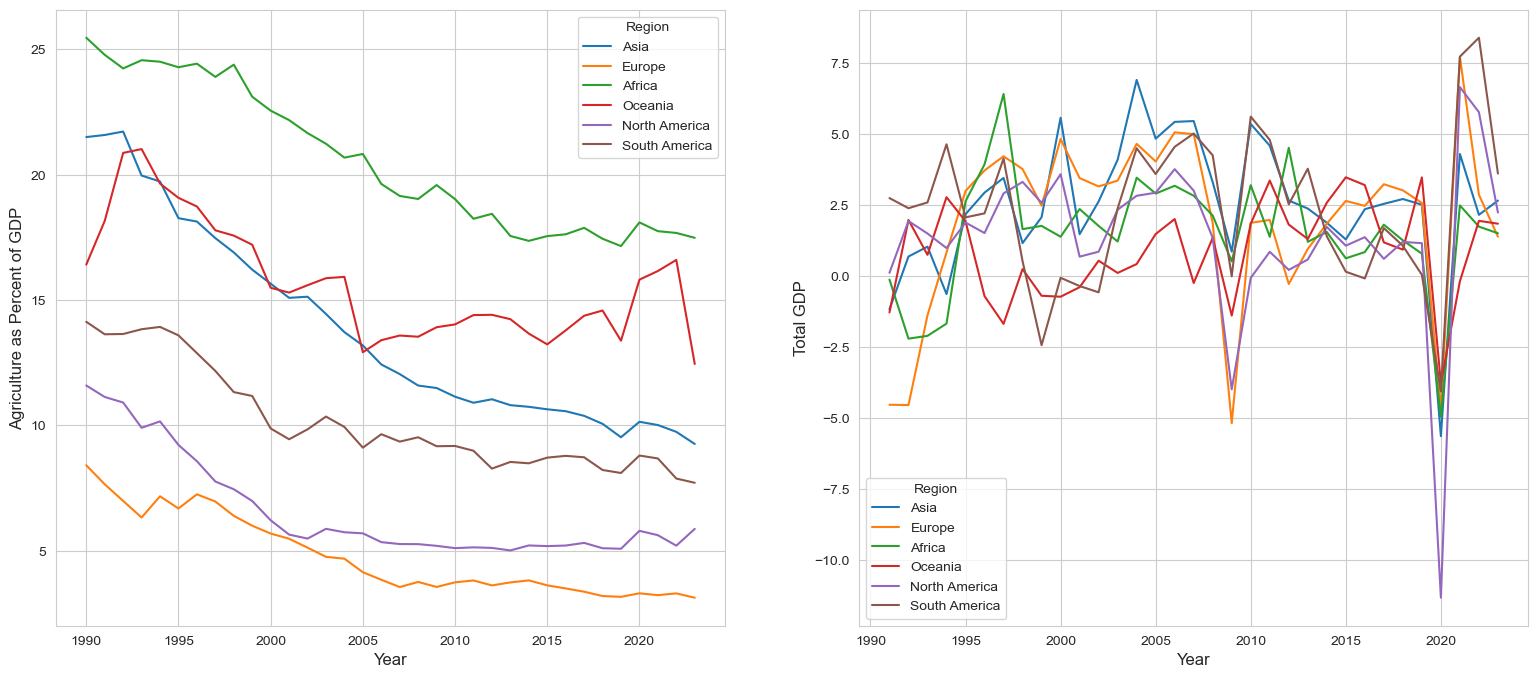

In [53]:
sns.set_style("whitegrid")
plt.figure(figsize=(19,8))
plt.subplot(1,2,1)
lineplot= sns.lineplot(data=df, x="Year", y="agr_pct", hue="Region", errorbar= None)

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("Agriculture as Percent of GDP", fontsize=12)
plt.xlabel("Year", fontsize=12)

plt.subplot(1,2,2)
lineplot= sns.lineplot(data=df, x="Year", y="gdp_change", hue="Region", errorbar= None)

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("Total GDP", fontsize=12)
plt.xlabel("Year", fontsize=12)



In [54]:
comm_df= pd.read_csv("long-term-prices-food/long-term-prices-food.csv")

comm_df= comm_df[comm_df['Year']>=1990]

comm_df.head(10)

,Entity,Code,Year,Tea,Sugar,Peanuts,Palm oil,Coffee,Cocoa,Wheat,Rye,Rice,Corn,Barley,Pork,Beef,Lamb
140,World,OWID_WRL,1990,40.123040,28.876303,54.052673,20.032463,59.428436,22.641200,29.619104,25.981090,26.586964,39.840664,50.975513,36.833317,213.561870,342.00714
141,World,OWID_WRL,1991,31.326242,19.789680,48.439327,22.491016,54.171444,20.498623,27.767809,26.244135,27.625677,37.488537,47.914310,31.286650,212.943150,284.12305
142,World,OWID_WRL,1992,29.143229,19.405819,30.358040,25.343906,39.634220,18.309504,31.023596,27.561697,24.526957,34.846250,46.744835,19.275536,190.515270,303.55746
143,World,OWID_WRL,1993,28.483273,20.860395,40.283375,23.622350,42.523730,18.057966,27.970260,28.672068,20.901165,33.722992,41.175888,21.377888,197.259050,316.93740
144,World,OWID_WRL,1994,25.662810,24.574415,34.338120,32.219204,87.900060,22.005920,28.037010,29.600718,23.165049,34.080370,40.863163,18.224144,171.415370,312.88490
145,World,OWID_WRL,1995,24.896057,26.206476,31.822163,37.250664,86.115490,21.958345,32.932148,30.917168,27.019201,38.463510,56.891600,19.728174,133.522720,274.17838
146,World,OWID_WRL,1996,26.974712,22.915457,32.678730,30.576649,67.628100,21.673140,35.821910,38.314700,27.709290,50.697080,63.577255,28.222822,121.454840,342.08508
147,World,OWID_WRL,1997,32.714690,21.302960,32.823093,30.730633,102.274060,23.562044,26.840046,37.961460,24.260893,35.232685,50.502983,21.734758,125.393105,345.49420
148,World,OWID_WRL,1998,31.993238,16.463388,32.330463,37.202774,72.034320,24.026937,20.516506,24.819809,23.939823,28.525028,43.496900,13.399610,114.648780,262.61963
149,World,OWID_WRL,1999,28.135727,11.306801,27.629171,23.648193,54.148950,15.920426,17.330507,22.137957,19.129982,24.370176,37.996240,12.761751,118.324524,256.51752


In [55]:
test=comm_df[['Year']].copy()
test['cost']= comm_df['Tea'].copy()
test.head()

,Year,cost
140,1990,40.123040
141,1991,31.326242
142,1992,29.143229
143,1993,28.483273
144,1994,25.662810


In [56]:
comm_l= ['Tea', 'Sugar', 'Peanuts', 'Palm oil', 'Coffee', 'Cocoa', 'Rye', 'Rice', 'Corn', 'Barley', 'Pork', 'Beef', 'Lamb']
comm= []
for i in comm_l:
    x = comm_df[['Year']].copy() 
    x['type']= i
    x['cost']=comm_df[i].copy()
    comm.append(x)

comm_all = pd.concat(comm)


comm_all.head(10)
    

,Year,type,cost
140,1990,Tea,40.123040
141,1991,Tea,31.326242
142,1992,Tea,29.143229
143,1993,Tea,28.483273
144,1994,Tea,25.662810
145,1995,Tea,24.896057
146,1996,Tea,26.974712
147,1997,Tea,32.714690
148,1998,Tea,31.993238
149,1999,Tea,28.135727


In [57]:
comm_all.groupby('type')['cost'].mean()

type
Barley       50.468300
Beef        166.448404
Cocoa        22.704324
Coffee       57.892806
Corn         34.447405
Lamb        255.460786
Palm oil     28.414894
Peanuts      33.010794
Pork         17.392295
Rice         23.174969
Rye          35.087717
Sugar        19.719665
Tea          28.332614
Name: cost, dtype: float64

In [58]:
meat = ['Beef', 'Pork', 'Lamb']
crop = ['Tea', 'Sugar', 'Peanuts', 'Palm oil', 'Coffee', 'Cocoa', 'Rye', 'Rice', 'Corn', 'Barley']
comm_meat= comm_all[comm_all['type'].isin(meat)].copy()
comm_crop= comm_all[comm_all['type'].isin(crop)].copy()

(1990.0, 2020.0)

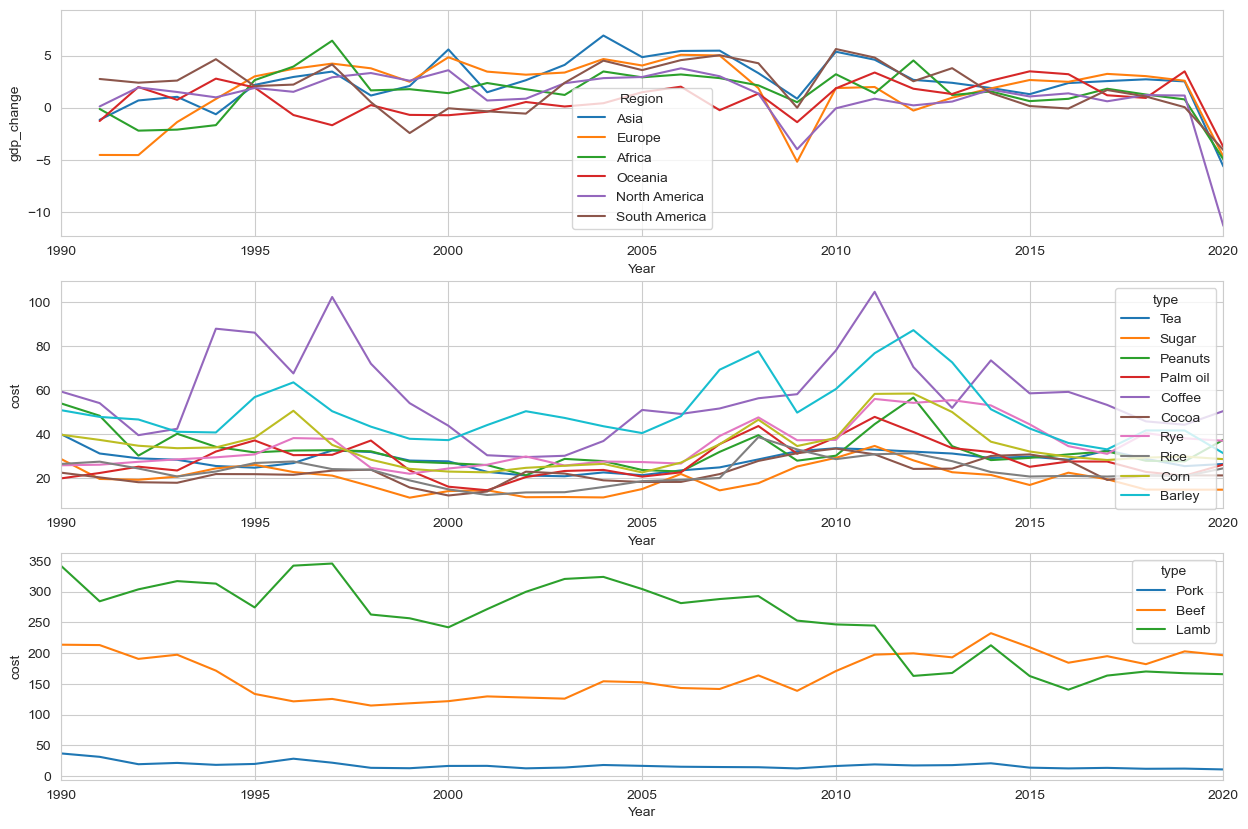

In [79]:
plt.figure(figsize=(15 ,10))
plt.subplot(3,1,1)
sns.lineplot(data=df, x='Year', y='gdp_change', hue='Region', errorbar=None)
plt.xlim((1990, 2020))

plt.subplot(3,1,2)
sns.lineplot(data=comm_crop, x='Year', y='cost', hue='type')
plt.xlim((1990, 2020))

plt.subplot(3,1,3)
sns.lineplot(data=comm_meat, x='Year', y='cost', hue='type')
plt.xlim((1990, 2020))


In [60]:
petrol= pd.read_csv("commodity-price-index-cereal-crops-and-petroleum/commodity-price-index-cereal-crops-and-petroleum.csv")
#petroleum index, with 1900 as reference, at 1900, these index set at 100
petrol = petrol[['Year', 'Petroleum']]
petrol = petrol[petrol['Year']>=1990]
petrol.head()


,Year,Petroleum
130,1990,278.80875
131,1991,234.68655
132,1992,218.06296
133,1993,191.13150
134,1994,172.31262


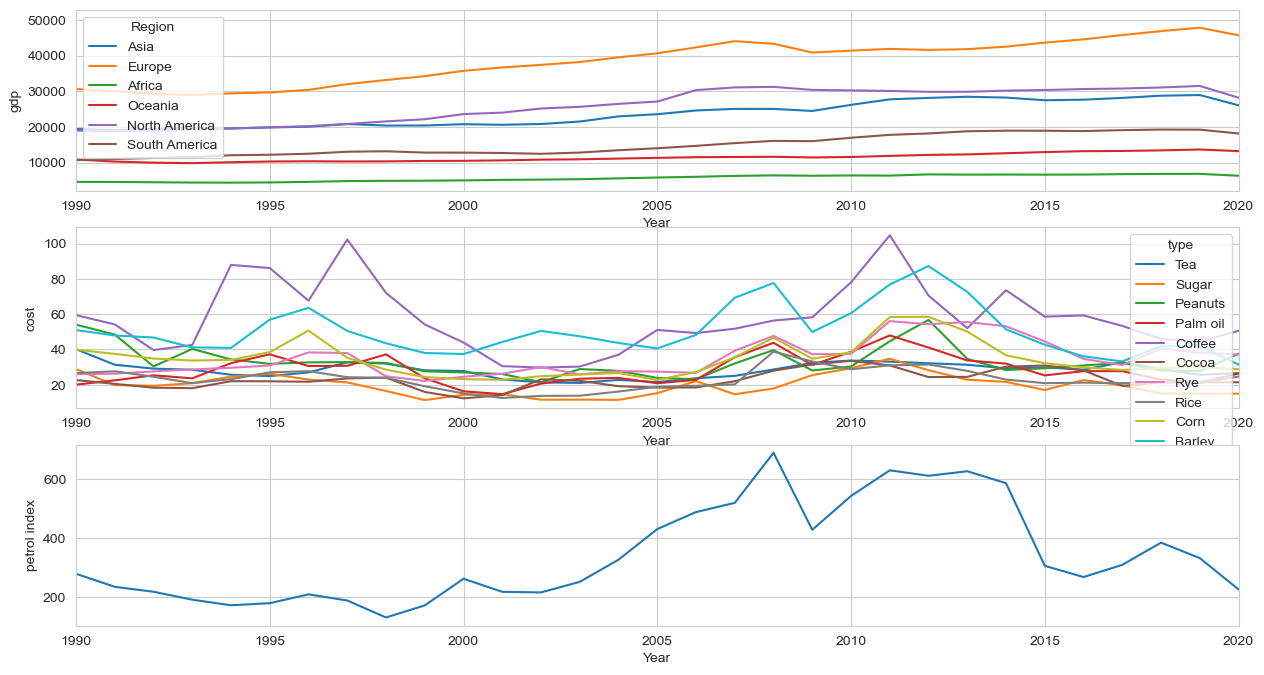

In [61]:
plt.figure(figsize=(15 ,8))
plt.subplot(3,1,1)
sns.lineplot(data=df, x='Year', y='gdp', hue='Region', errorbar=None)
plt.xlim((1990, 2020))

plt.subplot(3,1,2)
sns.lineplot(data=comm_crop, x='Year', y='cost', hue='type')
plt.xlim((1990, 2020))

plt.subplot(3,1,3)
pet_fig= sns.lineplot(data=petrol, x='Year', y='Petroleum')
plt.xlim((1990, 2020))
pet_fig.set(xlabel='Year', ylabel='petrol index')


plt.show()


In [62]:
ag_out= pd.read_csv("agricultural-output-dollars/agricultural-output-dollars.csv")
ag_out= ag_out[ag_out['Year']>=1990]

ag_out['Region']= ag_out['Entity'].map(region)
ag_out.head()


,Entity,Code,Year,output_quantity,Region
29,Afghanistan,AFG,1990,3184111000,Asia
30,Afghanistan,AFG,1991,3678525000,Asia
31,Afghanistan,AFG,1992,3569955000,Asia
32,Afghanistan,AFG,1993,3762272000,Asia
33,Afghanistan,AFG,1994,3970385000,Asia


<Axes: xlabel='Region', ylabel='output_quantity'>

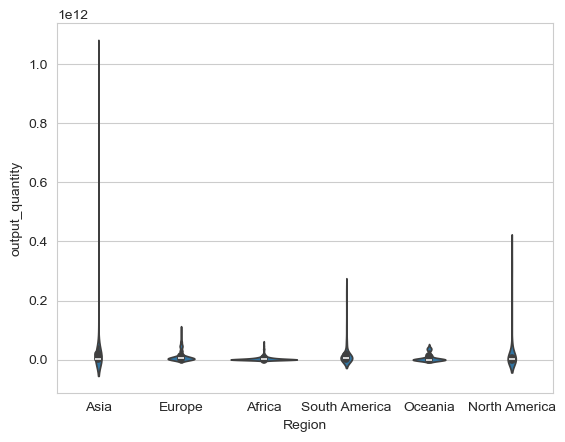

In [63]:
sns.violinplot(data=ag_out, x='Region', y='output_quantity')

(1990.0, 2020.0)

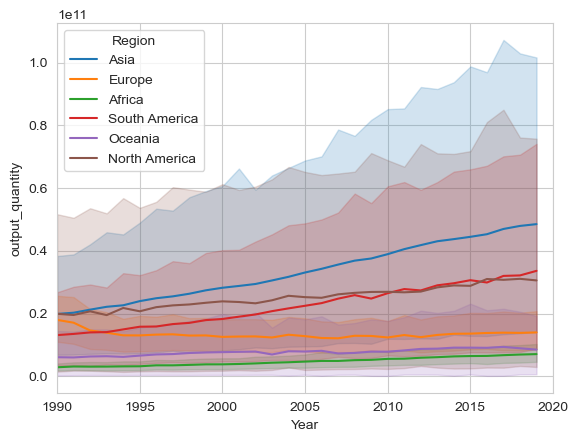

In [64]:
sns.lineplot(data=ag_out, x='Year', y='output_quantity', hue='Region')
plt.xlim((1990, 2020))


In [65]:
africa_ag= ag_out[ag_out['Region']=='Africa'].copy()
africa_ag

sum= africa_ag.groupby('Entity')['output_quantity'].describe()
sum.sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
Entity,,,,,,,,
Sao Tome and Principe,30.0,3.282830e+07,6.156346e+06,1.729300e+07,3.057675e+07,3.506550e+07,3.580275e+07,4.247200e+07
Cape Verde,30.0,5.447820e+07,1.017493e+07,3.676800e+07,4.428050e+07,5.911550e+07,6.184375e+07,6.868400e+07
Djibouti,30.0,6.658490e+07,9.323379e+06,5.191300e+07,5.729325e+07,7.066400e+07,7.298775e+07,8.499300e+07
Equatorial Guinea,30.0,6.986070e+07,1.053462e+07,5.683300e+07,6.062600e+07,6.674500e+07,7.811775e+07,9.091700e+07
Comoros,30.0,8.625207e+07,8.645291e+06,6.576600e+07,8.027750e+07,8.618800e+07,9.421775e+07,9.656700e+07
Gambia,30.0,1.923984e+08,4.281112e+07,1.221240e+08,1.502718e+08,1.975325e+08,2.205562e+08,2.920720e+08
Lesotho,30.0,2.457911e+08,2.573326e+07,1.848460e+08,2.349860e+08,2.488450e+08,2.620688e+08,2.917810e+08
Guinea-Bissau,30.0,3.375653e+08,9.345940e+07,2.112480e+08,2.553905e+08,3.169740e+08,4.301920e+08,4.859800e+08
Mauritius,30.0,3.405226e+08,2.017822e+07,2.769740e+08,3.310708e+08,3.399500e+08,3.519338e+08,3.858970e+08


In [66]:
africa_top= ['Nigeria', 'Egypt', 'South Africa','Sudan', 'Ethiopia', 'Morocco', 'Tanzania', 'Alheria', 'Kenya', 'Uganda']
africa_ag_top = africa_ag[africa_ag['Entity'].isin(africa_top)].copy()

africa_ag_top


,Entity,Code,Year,output_quantity,Region
3318,Egypt,EGY,1990,15785506000,Africa
3319,Egypt,EGY,1991,16637909000,Africa
3320,Egypt,EGY,1992,17830271000,Africa
3321,Egypt,EGY,1993,18371634000,Africa
3322,Egypt,EGY,1994,18403576000,Africa
...,...,...,...,...,...
11115,Uganda,UGA,2015,8775461000,Africa
11116,Uganda,UGA,2016,8056567000,Africa
11117,Uganda,UGA,2017,8536130000,Africa
11118,Uganda,UGA,2018,8632568000,Africa


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'petrol index')]

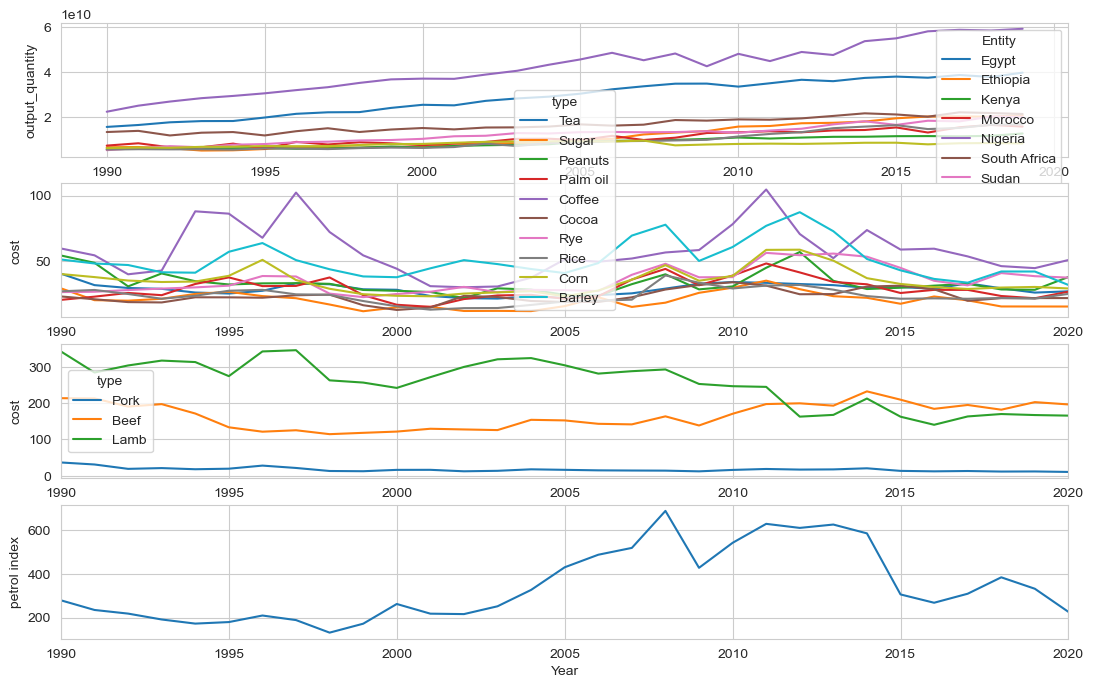

In [67]:
plt.figure(figsize=(13,8))
plt.subplot(4,1,1)
sns.lineplot(data=africa_ag_top, x='Year', y= 'output_quantity', hue='Entity')

plt.subplot(4,1,2)
sns.lineplot(data=comm_crop, x='Year', y='cost', hue='type')
plt.xlim((1990, 2020))

plt.subplot(4,1,3)
sns.lineplot(data=comm_meat, x='Year', y='cost', hue='type')
plt.xlim((1990, 2020))

plt.subplot(4,1,4)
pet_fig= sns.lineplot(data=petrol, x='Year', y='Petroleum')
plt.xlim((1990, 2020))
pet_fig.set(xlabel='Year', ylabel='petrol index')


In [68]:
## unemployment
employ = pd.read_csv("unemployment-rate/unemployment-rate.csv")
employ.head()

,Entity,Code,Year,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,AFG,1991,7.946
1,Afghanistan,AFG,1992,7.940
2,Afghanistan,AFG,1993,7.961
3,Afghanistan,AFG,1994,7.980
4,Afghanistan,AFG,1995,7.967


In [69]:
employ['Region']= employ['Entity'].map(region)
employ['unemployed']=employ["Unemployment, total (% of total labor force) (modeled ILO estimate)"].copy()

In [ ]:
employ['unemp_change'] = employ.groupby('Entity')['unemployed'].pct_change()*100

In [90]:
## economic inequality (GINI index)
gini= pd.read_csv("gini-coefficient.csv")
gini = gini[gini['Year']>=1990]
gini['Region'] = gini['Country'].map(region)
gini['gini']= gini['Gini coefficient (before tax) (World Inequality Database)']

gini.head()

,Country,Year,Gini coefficient (before tax) (World Inequality Database),Region,gini
10,Afghanistan,1990,NaN,Asia,NaN
11,Afghanistan,1991,NaN,Asia,NaN
12,Afghanistan,1992,NaN,Asia,NaN
13,Afghanistan,1993,NaN,Asia,NaN
14,Afghanistan,1994,NaN,Asia,NaN


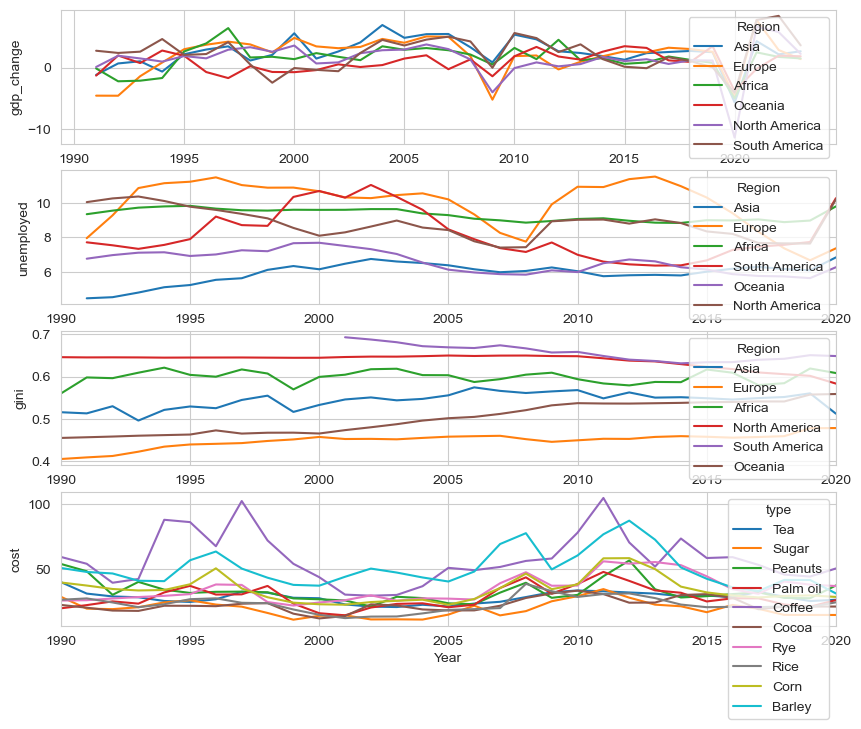

In [91]:
plt.figure(figsize=(10,8))
plt.subplot(4,1,1)
gdp=sns.lineplot(data=df, x='Year', y= 'gdp_change', hue='Region', errorbar=None)
sns.move_legend(gdp, 'upper right')

plt.subplot(4,1,2)
emp= sns.lineplot(data=employ, x='Year', y='unemployed', hue='Region', errorbar=None)
plt.xlim((1990, 2020))
sns.move_legend(emp, 'upper right')

plt.subplot(4,1,3)
ineq= sns.lineplot(data=gini, x='Year', y='gini', hue='Region', errorbar=None)
plt.xlim((1990, 2020))
sns.move_legend(ineq, 'upper right')

plt.subplot(4,1,4)
co=sns.lineplot(data=comm_crop, x='Year', y='cost', hue='type')
plt.xlim((1990, 2020))
sns.move_legend(co, 'upper right')



In [92]:
##key crop yields

crop_y= pd.read_csv("key-crop-yields/key-crop-yields.csv")
crop_y.columns

def colstrip(t):
    out= t.split(" ")
    return out[0]

crop_col_d= {}
for i in crop_y.columns:
    crop_col_d[i] = colstrip(i)

crop_y = crop_y.rename(columns= crop_col_d)

crop_y = crop_y[crop_y['Year']>=1990]

crop_y['Region']= crop_y.Entity.map(region)
crop_y.head()

,Entity,Code,Year,Wheat,Rice,Bananas,Maize,Soybeans,Potatoes,"Beans,","Peas,",Cassava,Cocoa,Barley,Region
29,Afghanistan,AFG,1990,1.0510,1.9029,NaN,1.7582,NaN,16.8421,NaN,NaN,NaN,NaN,1.0537,Asia
30,Afghanistan,AFG,1991,1.0213,1.9364,NaN,1.6800,NaN,16.6418,NaN,NaN,NaN,NaN,1.0637,Asia
31,Afghanistan,AFG,1992,1.0313,1.7143,NaN,1.5000,NaN,16.6667,NaN,NaN,NaN,NaN,0.8000,Asia
32,Afghanistan,AFG,1993,1.0211,1.7143,NaN,1.6786,NaN,16.6912,NaN,NaN,NaN,NaN,1.0000,Asia
33,Afghanistan,AFG,1994,1.0250,1.9000,NaN,1.6667,NaN,16.5942,NaN,NaN,NaN,NaN,0.9200,Asia


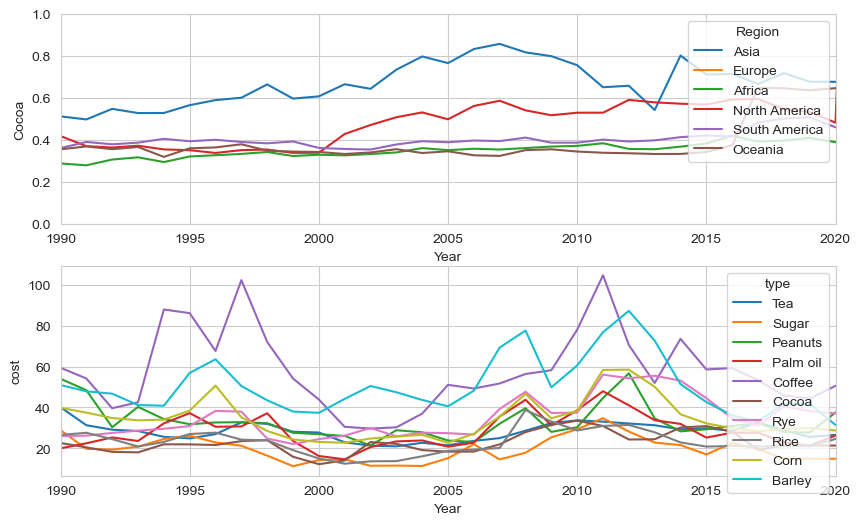

In [93]:
plt.figure(figsize= (10,6))
plt.subplot(2,1,1)
ax= sns.lineplot(data=crop_y, x= 'Year', y='Cocoa', hue='Region', errorbar=None)
sns.move_legend(ax, 'upper right')

plt.xlim(1990, 2020)
plt.ylim(0, 1.0)

plt.subplot(2,1,2)
az= sns.lineplot(data=comm_crop, x='Year', y='cost', hue='type')
plt.xlim((1990, 2020))
sns.move_legend(az, 'upper right')


In [94]:
## merge datasets
df.columns
ag=df[['Country', 'Code', 'Year', 'agr_pct', 'gdp', 'gdp_change', 'pop']].copy()

ag_df = pd.merge(ag, employ, on=['Code', 'Year'])
ag_df


,Country,Code,Year,agr_pct,gdp,gdp_change,pop,Entity,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Region,unemployed,unemp_change
0,Afghanistan,AFG,1991,NaN,NaN,NaN,12238879.0,Afghanistan,7.946,Asia,7.946,NaN
1,Afghanistan,AFG,1992,NaN,NaN,NaN,13278982.0,Afghanistan,7.940,Asia,7.940,-0.075510
2,Afghanistan,AFG,1993,NaN,NaN,NaN,14943174.0,Afghanistan,7.961,Asia,7.961,0.264484
3,Afghanistan,AFG,1994,NaN,NaN,NaN,16250799.0,Afghanistan,7.980,Asia,7.980,0.238663
4,Afghanistan,AFG,1995,NaN,NaN,NaN,17065836.0,Afghanistan,7.967,Asia,7.967,-0.162907
...,...,...,...,...,...,...,...,...,...,...,...,...
19132,Zimbabwe,ZWE,2019,9.819262,3294.8062,-7.785577,15271377.0,Zimbabwe,7.373,Africa,7.373,8.554181
19133,Zimbabwe,ZWE,2020,8.772859,2987.2698,-9.333975,15526888.0,Zimbabwe,8.621,Africa,8.621,16.926624
19134,Zimbabwe,ZWE,2021,8.849899,3184.7854,6.611910,15797220.0,Zimbabwe,9.540,Africa,9.540,10.660016
19135,Zimbabwe,ZWE,2022,7.170550,3323.1218,4.343665,16069061.0,Zimbabwe,10.087,Africa,10.087,5.733753


In [95]:
fulldf= pd.merge(ag_df, gini, on=['Country', 'Year'])


<Figure size 1200x500 with 0 Axes>

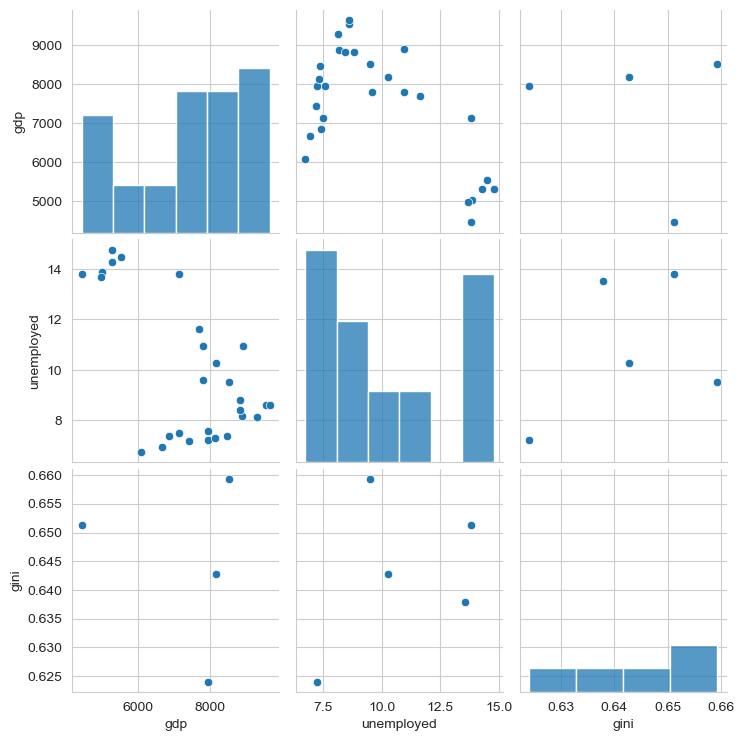

In [99]:
plt.figure(figsize=(12,5))
sns.pairplot(data= fulldf[fulldf['Country']=='Syria'], x_vars= ['gdp', 'unemployed', 'gini'], y_vars = ['gdp', 'unemployed', 'gini'])

<Axes: xlabel='Year', ylabel='gdp_change'>

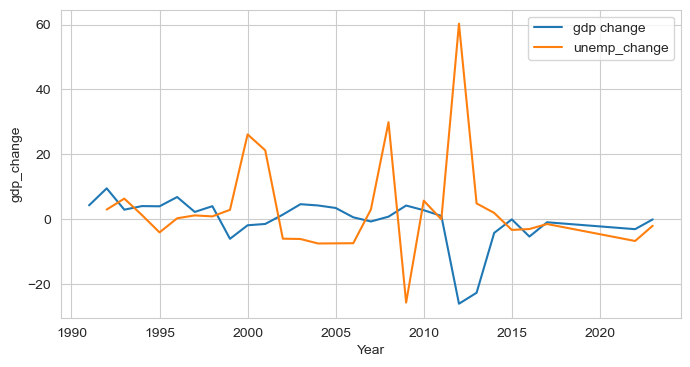

In [112]:
plt.figure(figsize=(8,4))
sns.lineplot(data=fulldf[fulldf['Country']=='Syria'], x='Year', y='gdp_change', legend='auto', label='gdp change')
sns.lineplot(data=fulldf[fulldf['Country']=='Syria'], x='Year', y='unemp_change', legend='auto', label='unemp_change')


<Figure size 1200x500 with 0 Axes>

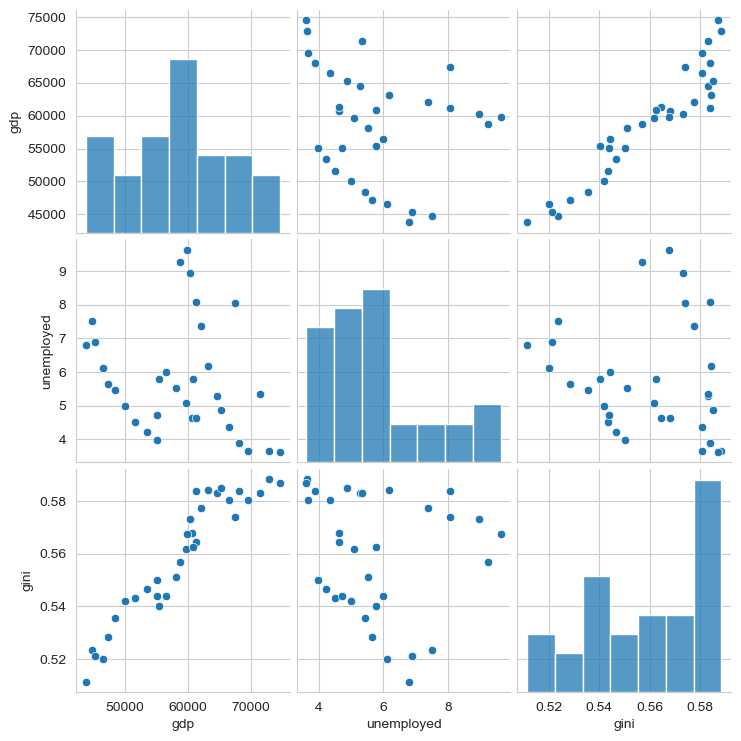

In [102]:
plt.figure(figsize=(12,5))
sns.pairplot(data= fulldf[fulldf['Country']=='United States'], x_vars= ['gdp', 'unemployed', 'gini'], y_vars = ['gdp', 'unemployed', 'gini'])

<Axes: xlabel='Year', ylabel='gdp_change'>

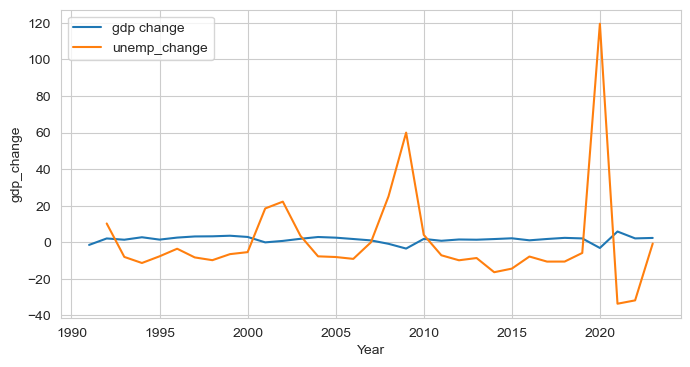

In [113]:
plt.figure(figsize=(8,4))
sns.lineplot(data=fulldf[fulldf['Country']=='United States'], x='Year', y='gdp_change', legend='auto', label='gdp change')
sns.lineplot(data=fulldf[fulldf['Country']=='United States'], x='Year', y='unemp_change', legend='auto', label='unemp_change')


Index(['Entity', 'Code', 'Year', 'output_quantity', 'Region'], dtype='object')

In [ ]:
## select countries based on their ag output

all_reg = ag_out.Entity.unique()
avg_d={}
for c in all_reg:
    avg_d[c] = ag_out[ag_out['Entity']==c]['output_quantity'].mean()

avg_ag=pd.DataFrame({'Country':[i for i in avg_d.keys()], 'avg_ag': [y for y in avg_d.values()]})
avg_ag.head()

,Country,avg_ag
0,Afghanistan,4.869669e+09
1,Albania,1.559528e+09
2,Algeria,8.852164e+09
3,Angola,3.412298e+09
4,Argentina,5.370318e+10


In [153]:
avg_ag['Region'] = avg_ag['Country'].map(region)
rand_s = avg_ag.groupby('Region', group_keys=False).apply(lambda x: x.sample(frac=0.08, random_state=316))
rand_s

C:\Users\felic\AppData\Local\Temp\ipykernel_26296\3480589007.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rand_s = avg_ag.groupby('Region', group_keys=False).apply(lambda x: x.sample(frac=0.08, random_state=316))


,Country,avg_ag,Region
29,Cape Verde,5.447820e+07,Africa
134,Niger,3.313830e+09,Africa
160,Rwanda,2.359131e+09,Africa
16,Benin,2.495624e+09,Africa
95,Japan,2.978708e+10,Asia
89,Iran,3.346558e+10,Asia
88,Indonesia,7.524801e+10,Asia
9,Azerbaijan,3.299296e+09,Asia
142,Norway,5.587796e+09,Europe
67,Finland,3.208119e+09,Europe


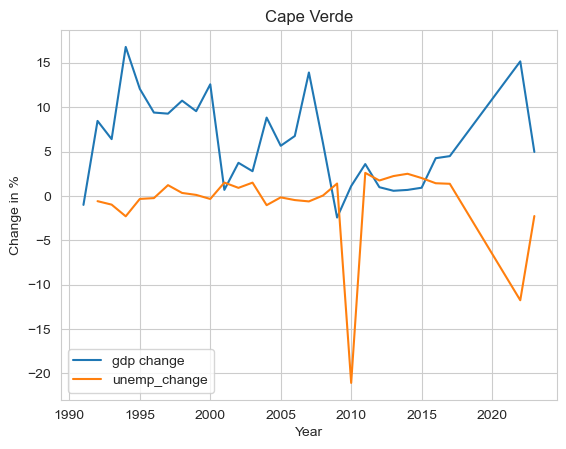

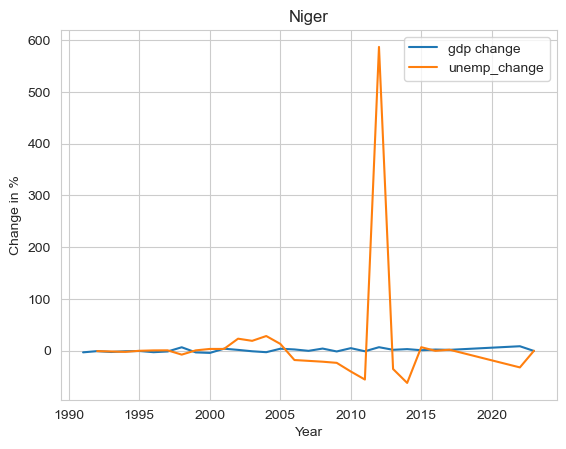

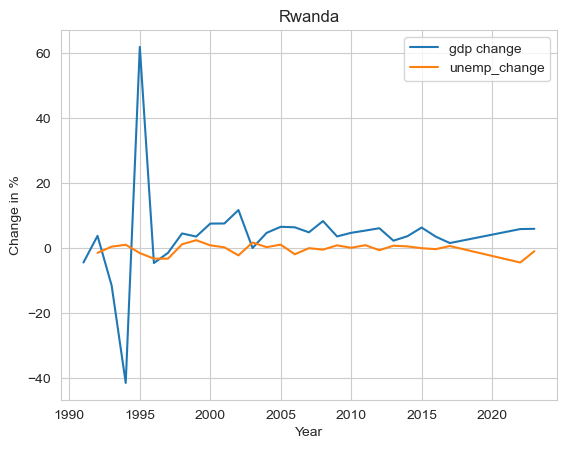

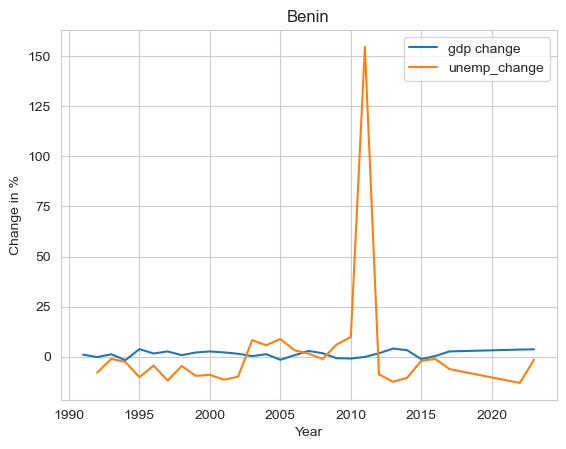

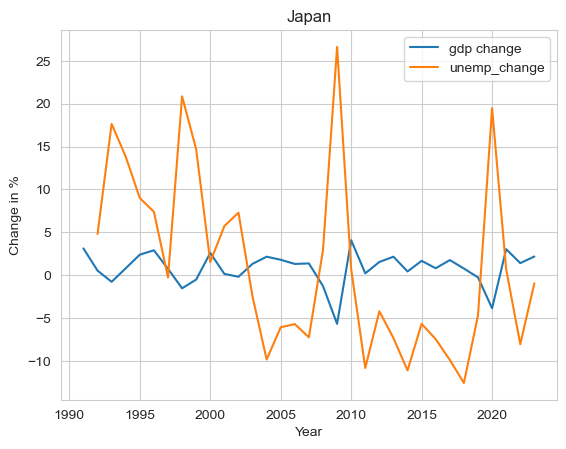

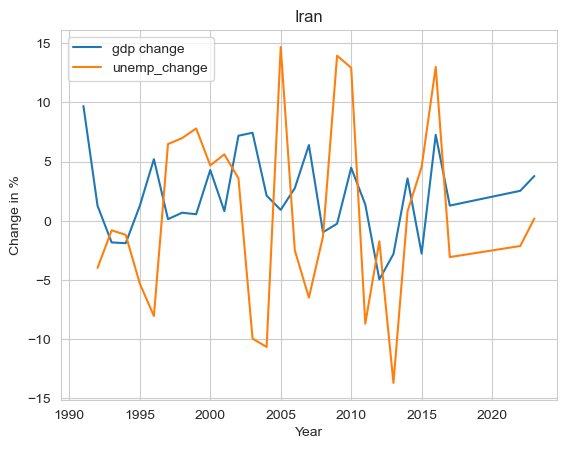

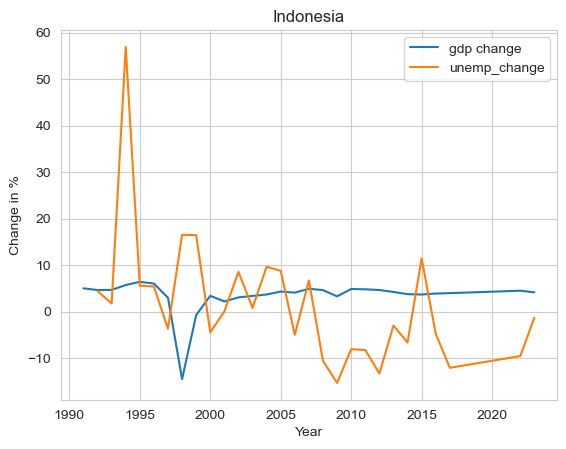

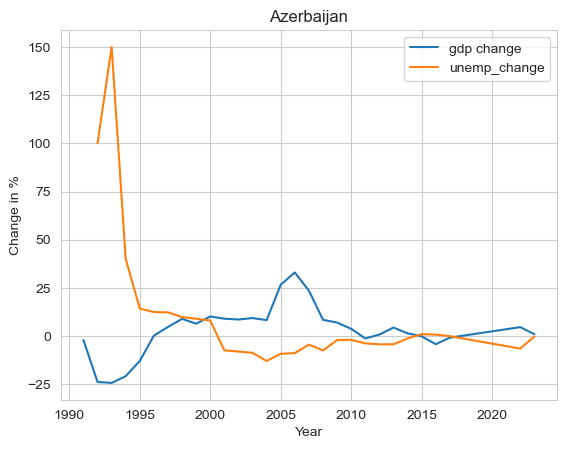

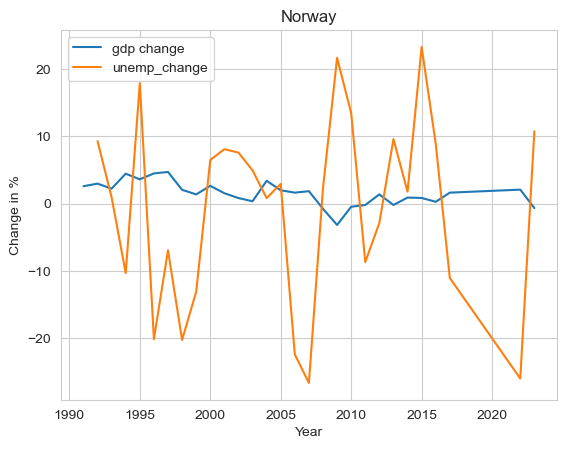

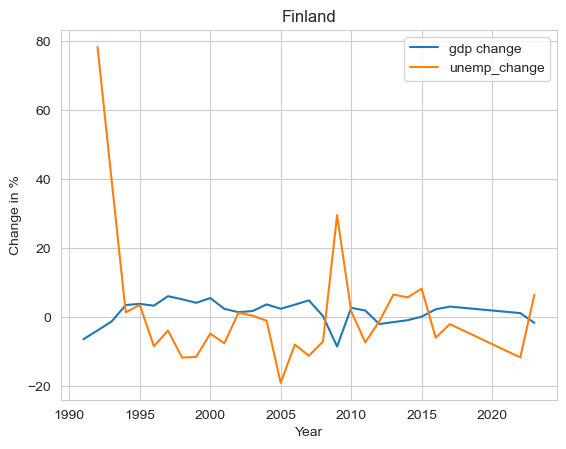

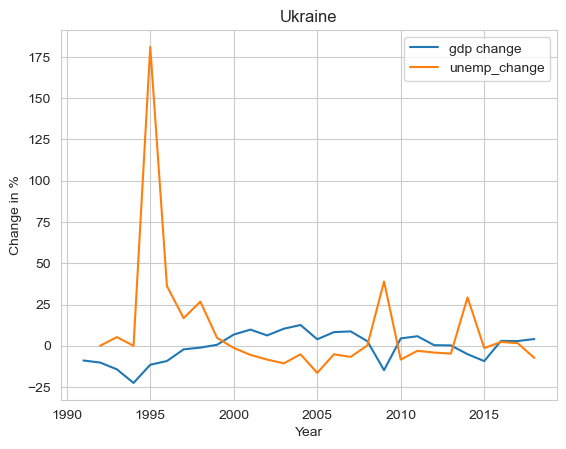

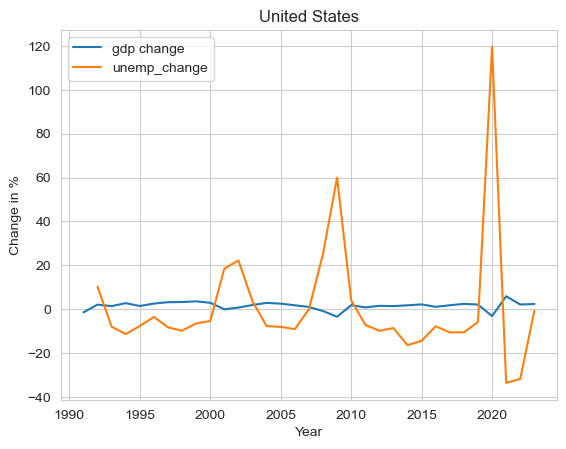

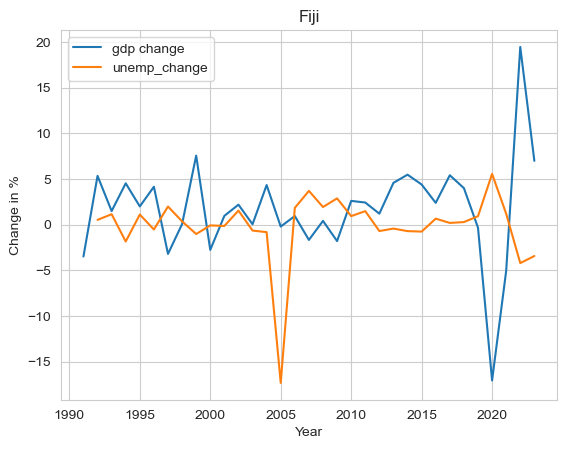

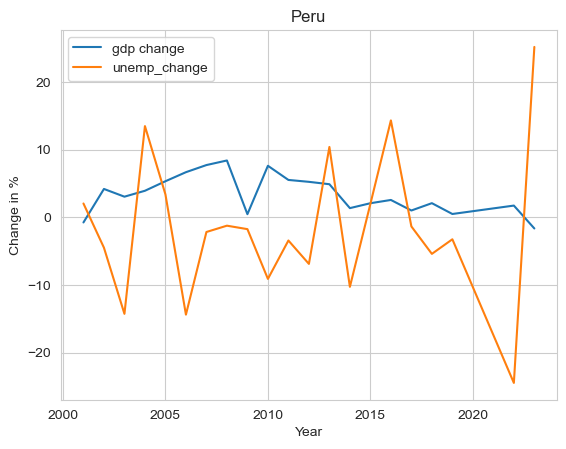

In [189]:
select_country= [i for i in rand_s['Country']]

for country in select_country:

    fig= sns.lineplot(data=fulldf[fulldf['Country']==country], x='Year', y='gdp_change', legend='auto', label='gdp change')
    fig= sns.lineplot(data=fulldf[fulldf['Country']==country], x='Year', y='unemp_change', legend='auto', label='unemp_change')
    fig.set_title(country)
    fig.set(xlabel='Year', ylabel='Change in %')

    plt.show()
